# Assignment: Linear Regression
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Things that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Python (Jupyter notebooks) and Linear Regression. Feel free to make some useful tests such as, but not limited to:
- What happens if the learning rate is too high or too low?
- Can Linear Regression really find the absolute global minimum?
- What effect does it have if you change the initial guess for the gradient descent to something completely off?
- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
- You can try to turn this code for Linear Regression into an implementation of Logistic Regression

## Import the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## Function to calculate the Gradiend descent

In [2]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    thetaHist=np.empty([maxsteps, 2])
    xTrans = x.transpose()
    for i in range(0, maxsteps):
        theta = theta - (alpha * np.matmul(np.linalg.inv(np.dot(x.transpose(),x)),np.dot(xTrans,y))).flatten()
        #theta = theta - (alpha * np.invert((xTrans * x)) * (xTrans * y)).flatten()
        thetaHist[i] = theta
   
    return theta, thetaHist

## Function to calcultate the cost function
The cost function template is returning two parameters, loss and cost. We proposed these two paremeters to facilitate the debugging (having not only the cost but also the difference between y and the prediction directly). You do not need to use both. Just the cost is enough to complete the assignment.

In [3]:
def costFunction(x, y, theta):
    # HERE YOU HAVE TO IMPLEMENT THE COST FUNCTION
    cost = (np.dot(x, theta) - y).transpose()@(np.dot(x, theta) - y)
    loss = 0
    return cost, loss

## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Variables x and y represent a (very simple) training set (a dataset with different samples). Feel free to play with this test data or use a more realistic one.

$NOTE:$ The column with 1’s included in the variable x is used to facilitate the calculations in the Gradient Descent function (do you remember the x<sub>0</sub> to use the matrix form? If not, revise the lecture).

In [4]:
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [5]:
m, n = np.shape(x)

## Plot training set


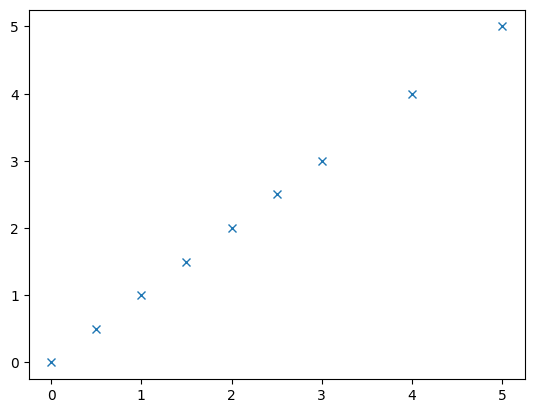

In [6]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x')

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [7]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)

J = np.zeros((len(theta0),(len(theta1))))

# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        theta = np.array([theta0[i], theta1[j]])
        costt, losss = costFunction(x, y, theta)
        J[i,j] = costt

## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


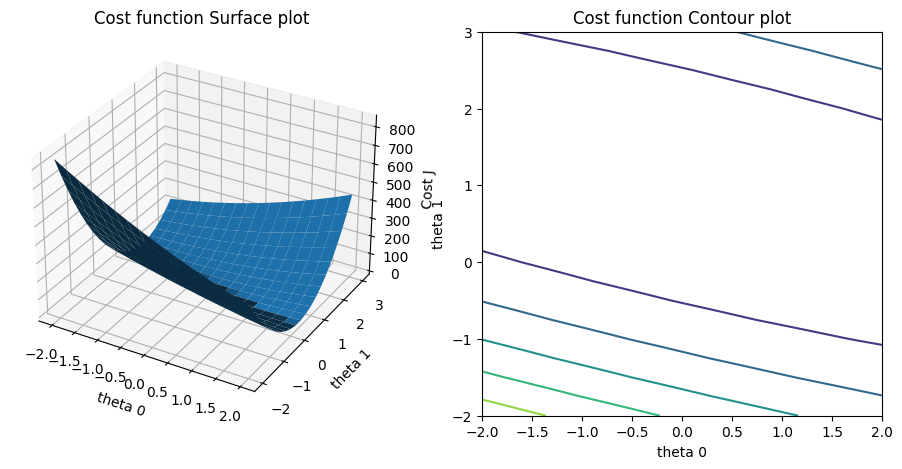

In [8]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')
# ax.set_xlim(-5,5)

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [9]:
alpha = -0.001    # learning parameter
maxsteps= 1000  # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

## Print found optimal values



In [10]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

#thet[0]-=2

Optimized Theta0 is  2.0
Optimized Theta1 is  1.0000000000000007


## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


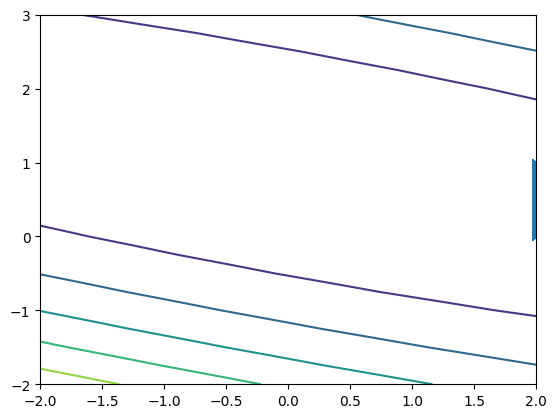

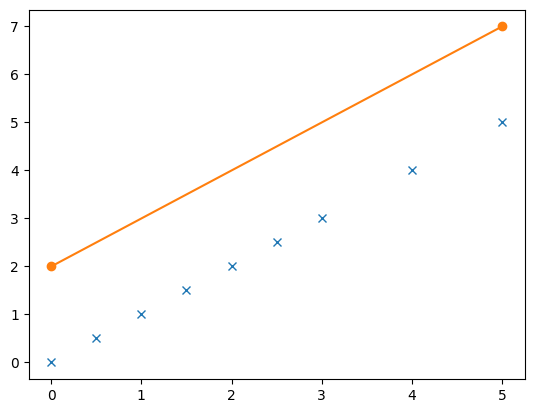

In [11]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
#ax.set_xlim(-5,5)

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

- What happens if the learning rate is too high or too low?

When learning rate is too high, the gradient moves too fast during gradient descent. The fitting line then goes to minus infinity on y-axis. If the learning rate is too low, that would make convergence slow.

Optimized Theta0 is  2.0
Optimized Theta1 is  -799.9999999999887


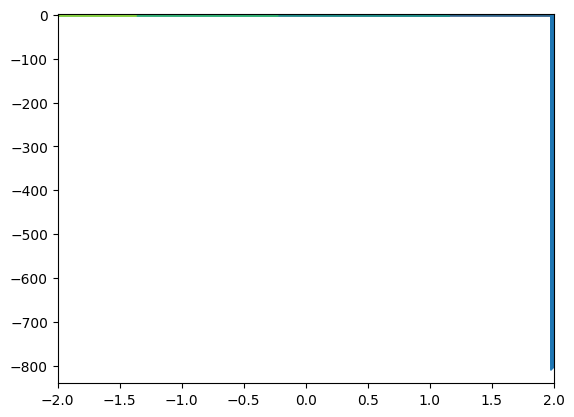

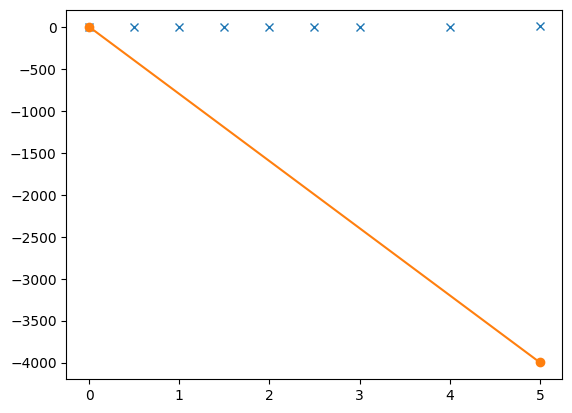

Optimized Theta0 is  2.0
Optimized Theta1 is  -0.0010000000000000152


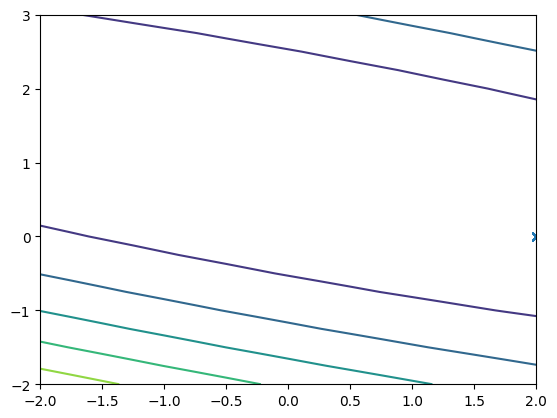

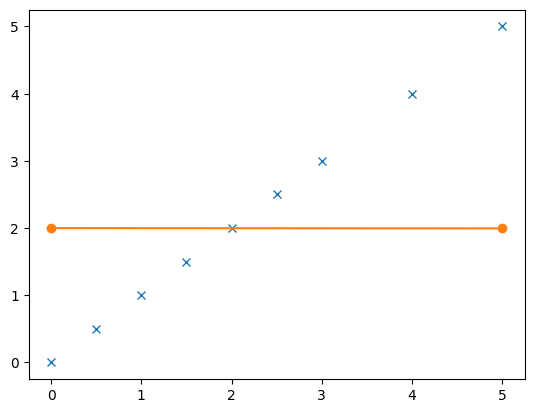

In [12]:
# Gradient decsent is too high -> 0.8

alpha = 0.8  # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

# Gradient decsent is too low -> 0.000001

alpha = 0.000001  # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

- Can Linear Regression really find the absolute global minimum?

Not necessarily. There is always a chance that the minimum found is not global, but local. A better initial guessn for gradient descent should help, but we cannot be sure.

- What effect does it have if you change the initial guess for the gradient descent to something completely off?

If a guess is not a lucky guess, it would make the result worse. If a guess is a very lucky guess, it would make the fit much better.

Honestly, I am not sure that my code is working properly, because it seems like I miss a shift somewhere by y-axis. I do not know how to fix it and would appreciate an explanation in the feedback:)

Optimized Theta0 is  34.0
Optimized Theta1 is  2.99999999999989


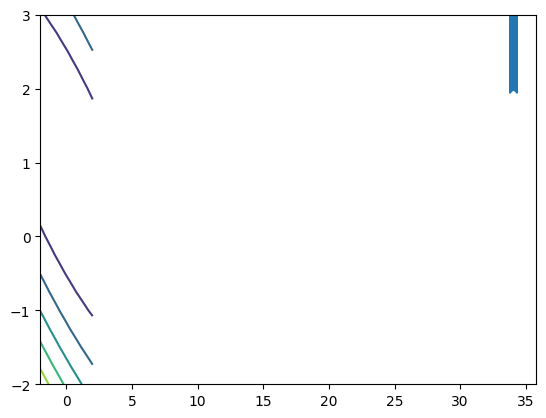

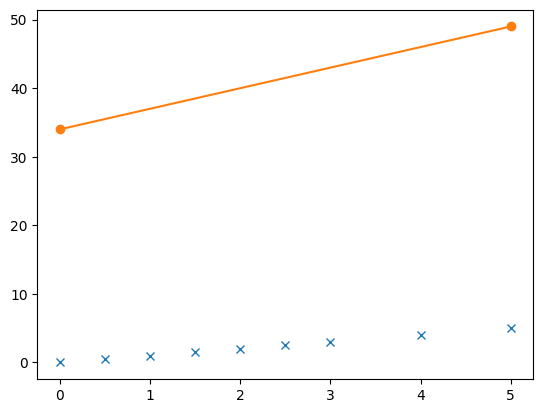

Optimized Theta0 is  -2.2204460492503146e-16
Optimized Theta1 is  1.0000000000000007


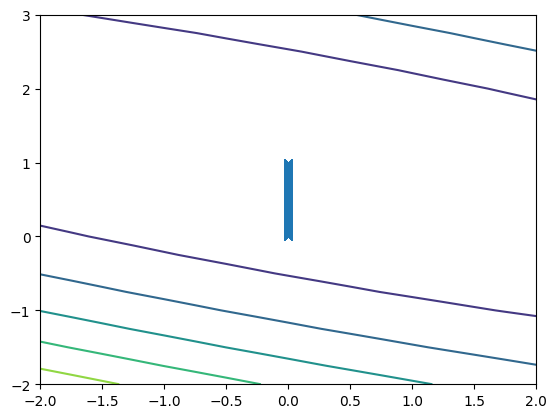

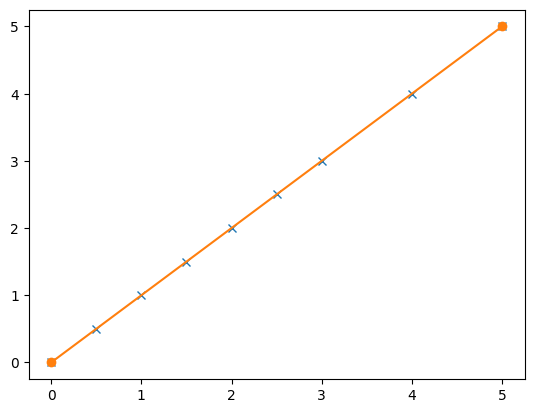

In [13]:
# Initial guess: thet = [34,2]

alpha = -0.001   # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [34,2]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

# Extremely smart initial guess: thet = [0,0]

alpha = -0.001  # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [0, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops?

If we do not update thetas simultaneously, the change in one theta will infuence the change in the other and thus they will be dependent on each other.